In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

import seaborn as sns; sns.set()

/home/dmitry/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Задача классификации
В общем виде, задача классификации возникает тогда, когда есть выборка объектов, имеющих набор признаков, один из которых, обязательно дискретный, является целевым и называется **классом**.
Решением задачи классификации является некоторый алгоритм, который сопоставляет множеству признаков **класс**. 

# Метрические методы

Для начала мы рассмотрим только метрические методы. Их применение возможно, когда в пространстве признаков существует *метрика*. 
Формально, метрика это функция $f$ от пары элементов пространства признаков, которая сопоставляет паре неотрицательное число и $f(X, X) = 0$.

Неформально - если мы можем **каким-то образом измерить близость признаков друг к другу**, то мы можем пользоваться метрическими методами

# Гипотеза компактности

Метрические методы работают на предположении о том, что объекты одного класса имеют схожие признаки. 
То есть, расстояние (метрика) между объектами одного класса оказывается меньше, чем расстояние между объектами из разных классов.

# Методы классификации
## Метод ближайших соседей (kNN)
Самым простым и понятным интуитивно является метод ближайших соседей (k-nearest neighbors). 
Идея лежащая в основе алгоритма: для объекта с неизвестным классом найдём ближайший объект с известным классом и будем предполагать, что целевой объект относится к тому же классу.
"Ближайший" имеется в виду в пространстве **признаков**.

Однако, делать выводы о классе на основании единственного известного объекта весьма ненадёжно. Лучше воспользоваться некоторой окрестностью, некоторым набором известных объектов.

* Возьмём $k$ ближайших к целевому $x$ известных объектов.
* Упорядочим их возрастанию расстояния $(y_1, y_2, ..., y_k)$. Индекс соответствует удалённости от $x$
* Сделаем оценку того, что объект принадлежит классу $c$, как количество соседей из класса $c$ делёное на $k$: $e(x, i) = \frac{1}{k}\sum_{i=1}^{k}{[class(y_i) == c]}$
* Выберем среди оценок наибольшую - это и будет предсказанный класс.

## Метод опорных векторов (SVM)
Идея метода опорных векторов заключается в нахождении гиперплоскости, которая бы максимально хорошо разделяла пространство признаков на два класса. 
То есть, после проведения такой гиперплоскости объекты одного класса оказываются с одной стороны гиперплоскости, объекты другого - с другой.

Лучшего понимания метода можно достигнуть визуализацией:

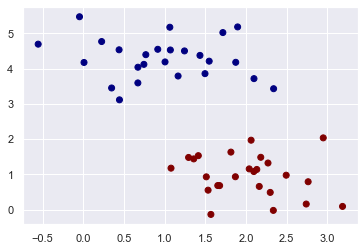

In [2]:
# Сгенерируем пару неперсекающихся областей точек:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

# И построим
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');  # cmap используется только для красоты.

Теперь построим прямые, *для двухмерного пространства это гиперплоскости*, которые бы идеально разделяли точки на два класса:

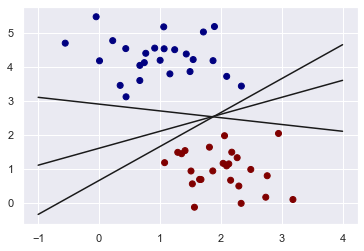

In [3]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

xfit = np.linspace(-1, 4)
for k, b in [[1, 0.65], [0.5, 1.6], [-0.2, 2.9]]:
    plt.plot(xfit, k*xfit + b, 'k');


В чем тут проблема? Возьмём некоторую точку:

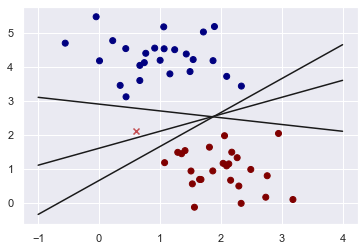

In [4]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

xfit = np.linspace(-1, 4)
for k, b in [[1, 0.65], [0.5, 1.6], [-0.2, 2.9]]:
    plt.plot(xfit, k*xfit + b, 'k')
    
plt.scatter([0.6], [2.1], marker='x', color='r');

Попытайтесь ответить на вопрос: "К какому классу отнести этот объект?" и придёте к выводу, что **не все гиперплоскости одинаково хороши**.
Метод опорных векторов предлагает алгоритм поиска оптимальной разделяющей гиперплоскости. 

Фокус заключается в том, что помимо гиперплоскости вводится понятия *отступа*. *Отступ* - это расстояние до ближайшей паралелльной гиперплоскости, которая *касается* точек класса:

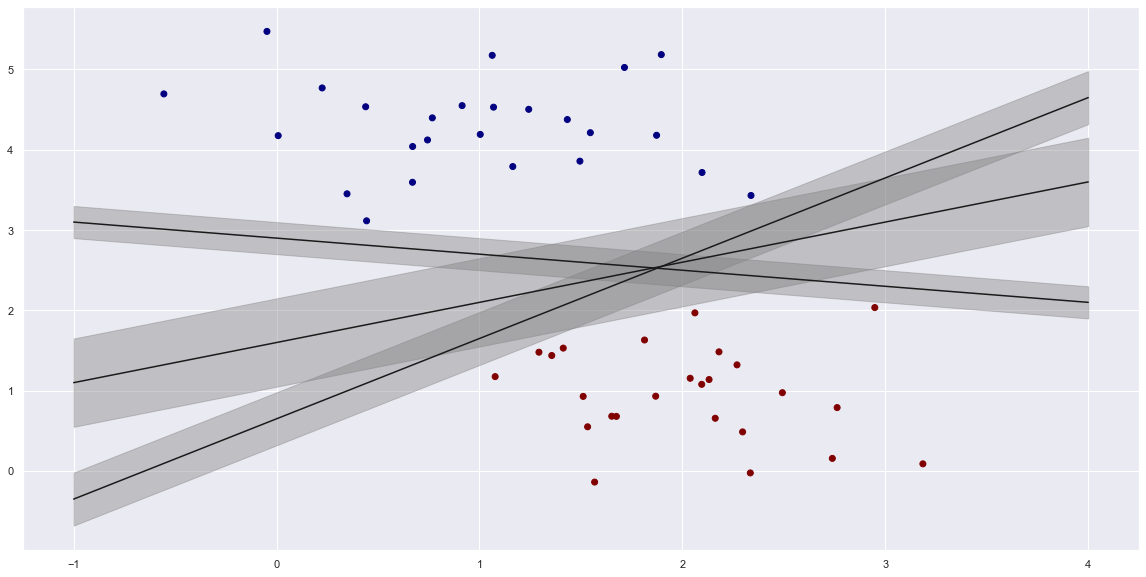

In [5]:
fig = plt.figure(figsize=(20, 10))
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

xfit = np.linspace(-1, 4)
for k, b, margin in [[1, 0.65, 0.33], [0.5, 1.6, 0.55], [-0.2, 2.9, 0.2]]:
    yfit = k*xfit + b
    plt.plot(xfit, yfit, 'k')
    plt.fill_between(xfit, yfit - margin, yfit + margin, edgecolor='none', color='gray', alpha=0.4);


Не все гиперплоскости одинаковы хороши. Однако их пригодность можно сравнивать. И **лучшей гиперплоскостью считается та, у которой величина отступа оказывается максимальной**. В данном случае, предпочтение отдаём вот этой:

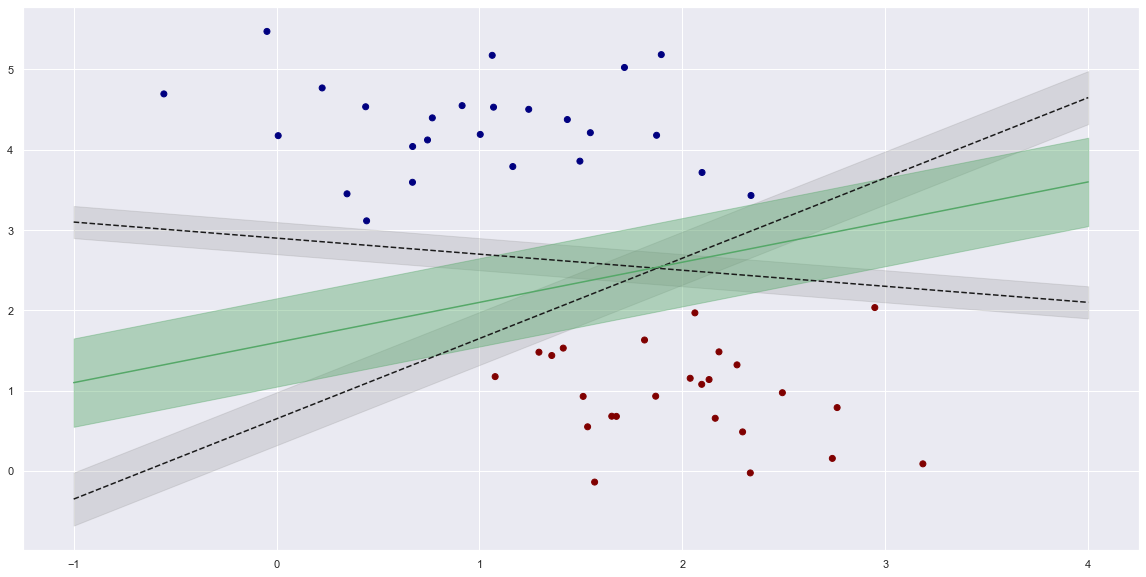

In [6]:
fig = plt.figure(figsize=(20, 10))
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

xfit = np.linspace(-1, 4)
for k, b, margin in [[1, 0.65, 0.33], [-0.2, 2.9, 0.2]]:
    yfit = k*xfit + b
    plt.plot(xfit, yfit, 'k--')
    plt.fill_between(xfit, yfit - margin, yfit + margin, edgecolor='none', color='gray', alpha=0.2)
    
k, b, margin = 0.5, 1.6, 0.55
yfit = k*xfit + b
plt.plot(xfit, yfit, 'g')
plt.fill_between(xfit, yfit - margin, yfit + margin, edgecolor='none', color='g', alpha=0.4);
